# *World University Rankings*


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import re
%matplotlib inline

In [20]:
uni = pd.read_csv("C:\\Users\\laksh\\Downloads\\3rd Year\\Devops\\eda project\\archive\\cwurData.csv")


In [44]:
uni

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [21]:
uni.head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [22]:
uni.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [23]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [24]:
uni.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [25]:
uni.isnull()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
uni.shape

(2200, 14)

In [27]:
uni['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [28]:
uni['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia        

In [29]:
uni.sort_values(by='country' )

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1943,744,National University of La Plata,Argentina,2,367,513,218,546,559,511,686.0,871,44.31,2015
1096,897,National University of Córdoba,Argentina,3,355,478,210,713,818,609,849.0,737,44.39,2014
2132,933,National University of Córdoba,Argentina,3,367,567,218,717,796,645,896.0,871,44.10,2015
940,741,National University of La Plata,Argentina,2,355,476,210,546,523,406,703.0,737,44.59,2014
1177,978,National University of Rosario,Argentina,4,355,478,210,976,811,800,956.0,737,44.29,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,663,Keele University,United Kingdom,50,355,478,210,635,535,406,569.0,737,44.69,2014
1895,696,Liverpool John Moores University,United Kingdom,53,367,567,218,723,395,511,606.0,871,44.37,2015
596,397,Cranfield University,United Kingdom,35,355,71,210,728,731,800,769.0,737,45.56,2014
1132,933,University of the Republic (Uruguay),Uruguay,1,355,478,210,940,744,800,889.0,737,44.35,2014


# correlation and Heatmap
uni.corr()

<AxesSubplot:title={'center':'Correlation Graph'}>

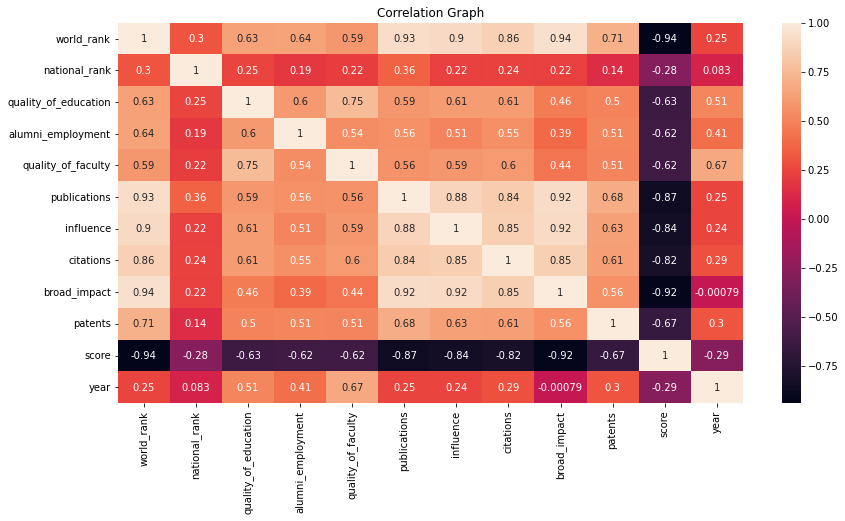

In [30]:
corr = uni.corr(method = 'spearman')
plt.figure(figsize=(14,7))
plt.title("Correlation Graph")

sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='world_rank', ylabel='quality_of_education'>

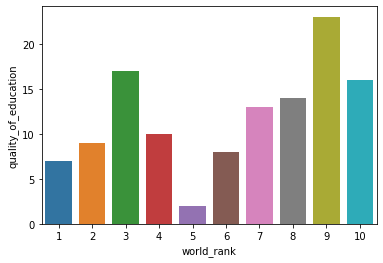

In [31]:
# Bar plot
 
sns.barplot(x=uni['world_rank'].head(10), y=uni['quality_of_education'])

<AxesSubplot:xlabel='world_rank', ylabel='publications'>

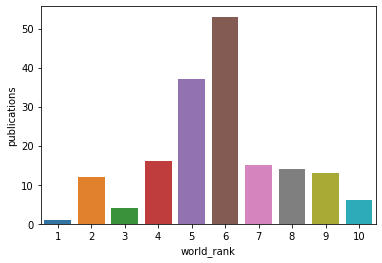

In [32]:
sns.barplot(x=uni['world_rank'].head(10), y=uni['publications'])

In [33]:

#Top 5 Universities from year 2012-2014
#The scatterplot below shows the top 5 univerisities in 2012-2015
#2012

uni1=uni[uni.year==2012]
uni1.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


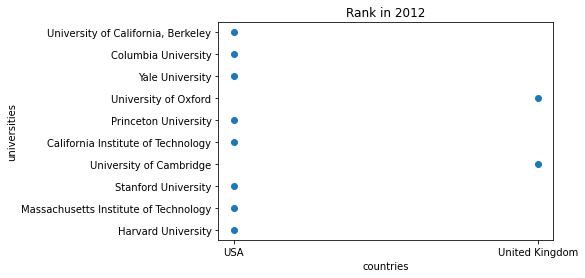

In [34]:
university2012 = uni1.head(10)
plt.scatter(university2012.country,university2012.institution,) 
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('Rank in 2012')
plt.show()

In [35]:
#2013 

uni2=uni[uni.year==2013]
uni2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
102,3,University of Oxford,United Kingdom,1,7,12,10,11,7,13,NaN,15,92.54,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
104,5,University of Cambridge,United Kingdom,2,3,15,5,9,11,10,NaN,39,90.24,2013


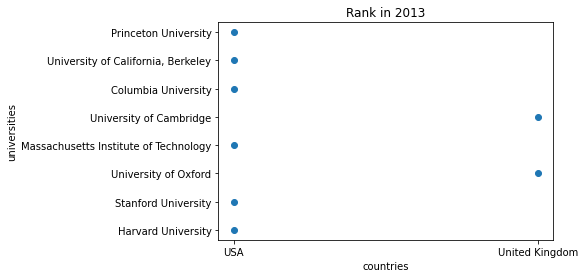

In [36]:
university2013 = uni2.head(8)
plt.scatter(university2013.country,university2013.institution,) 
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('Rank in 2013')
plt.show()

In [37]:
#2014
uni3=uni[uni.year==2014]
uni3.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


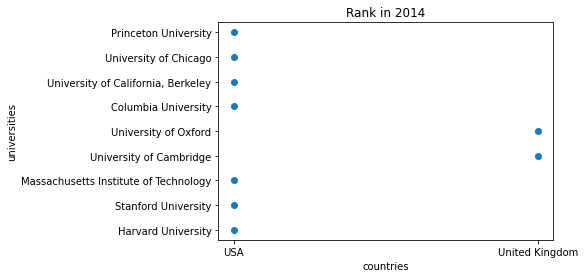

In [38]:
university2014 = uni3.head(9)
plt.scatter(university2014.country,university2014.institution,) 
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('Rank in 2014')
plt.show()

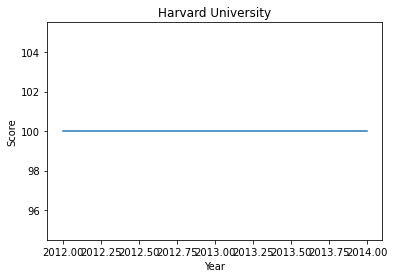

In [39]:
#Line Plots
#Let us see the progress scores for the top 5 universities from year 2012-2014 using line charts!
#Harvard University
#Harvard has maintained a score of 100 from 2012-2014.

years = [2012,2013,2014]
score = [100,100,100,]
plt.plot(years, score)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title("Harvard University");

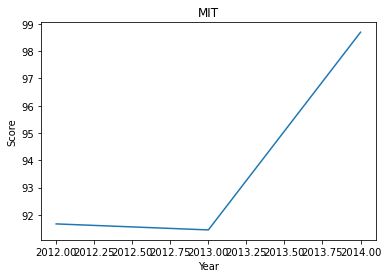

In [40]:
#MIT
years = [2012,2013,2014]
score = [91.67,91.45,98.69]
plt.plot(years, score)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title("MIT");

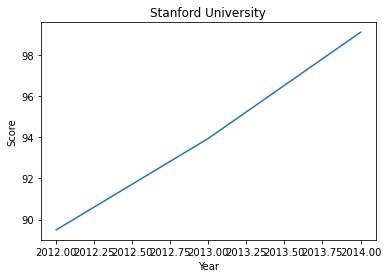

In [41]:
#Stanford University
years = [2012,2013,2014,]
score = [89.5,93.94,99.09]
plt.plot(years, score)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title("Stanford University");

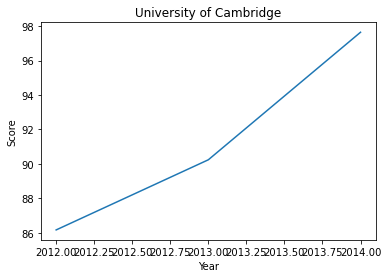

In [42]:
#University of Cambridge

years = [2012,2013,2014]
score = [86.17,90.24,97.64]
plt.plot(years, score)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title("University of Cambridge");

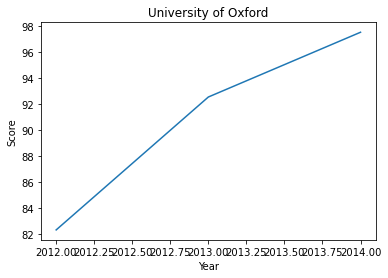

In [43]:
#University of Oxford

years = [2012,2013,2014]
score = [82.34,92.54,97.51]
plt.plot(years, score)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title("University of Oxford");